# Luminosity plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in data
tbl = pd.read_csv('preprocessed_data_avg.csv')
display(tbl.head())


,Unnamed: 0,Source,Filter,Obs_number,Detected Name,Date obs,RA,DEC,Error_circle (arcsec),Position_source,...,log_L_NIR_errup_nodist,log_L_NIR_errlow_nodist,log_L_NIR_errup_noflux,log_L_NIR_errlow_noflux,log_L_X_errup_nodist,log_L_X_errlow_nodist,log_L_X_errup_noflux,log_L_X_errlow_noflux,log_L_NIR_upplim,log_L_X_upplim
0,0,RX_J1735.3-3540,J,3081,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.003808,0.003808,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
1,2,RX_J1735.3-3540,H,3063,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.002848,0.002848,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
2,4,RX_J1735.3-3540,Ks,3045,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.003019,0.003019,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
3,6,UW_Crb,Ks,1081,S,2018-06-19,16 05 45.8746697208,25 51 45.246497976,0.10,"Gaia Collaboration 2020, Gaia",...,0.051416,0.051416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,UW_Crb,H,1086,S,2018-06-19,16 05 45.8746697208,25 51 45.246497976,0.10,"Gaia Collaboration 2020, Gaia",...,0.038230,0.038230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


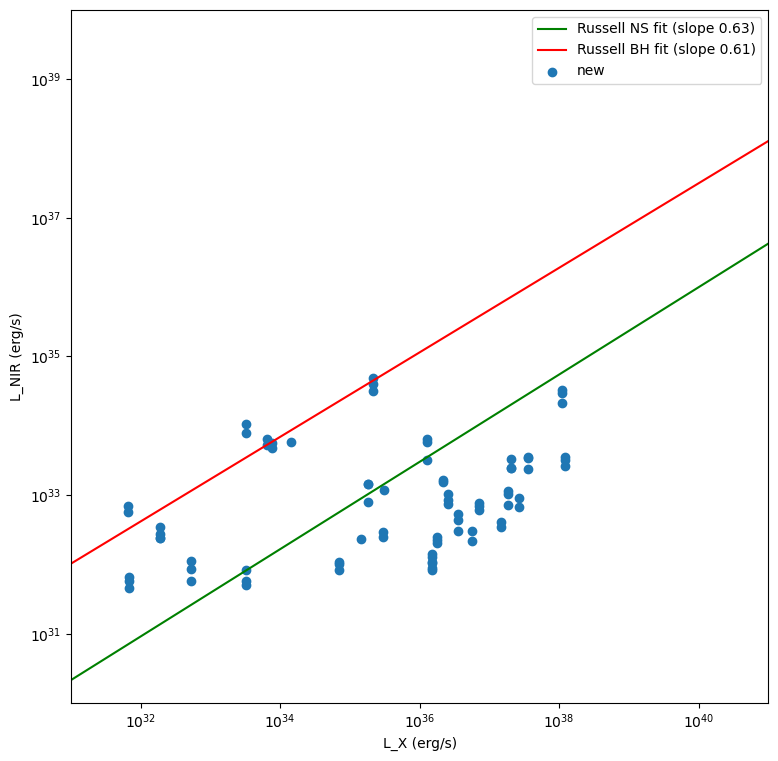

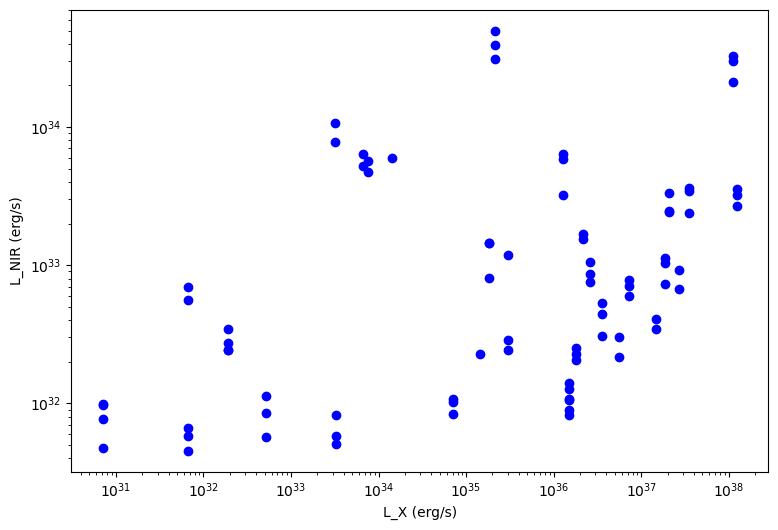

In [3]:

# tbl = tbl[tbl['Filter']=='Ks'] # TODO


fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

ax.scatter(tbl['L_X'], tbl['L_NIR'], label='new')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e30, 10e40)
ax.set_ylim(10e29, 10e39)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize = (9, 6))

for n, r in tbl.iterrows():
#     s = r['Source']
#     if s in quiescent_sources: 
#         c = 'Red'
#     else:
    c = 'Blue'
#     plt.scatter(ratio_list[n], source_list[n], color=c, zorder=10)
    ax.scatter(tbl['L_X'][n], tbl['L_NIR'][n], color=c)  
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
# ax.set_xlim(10e30, 10e40)
# ax.set_ylim(10e29, 10e39)
plt.show()


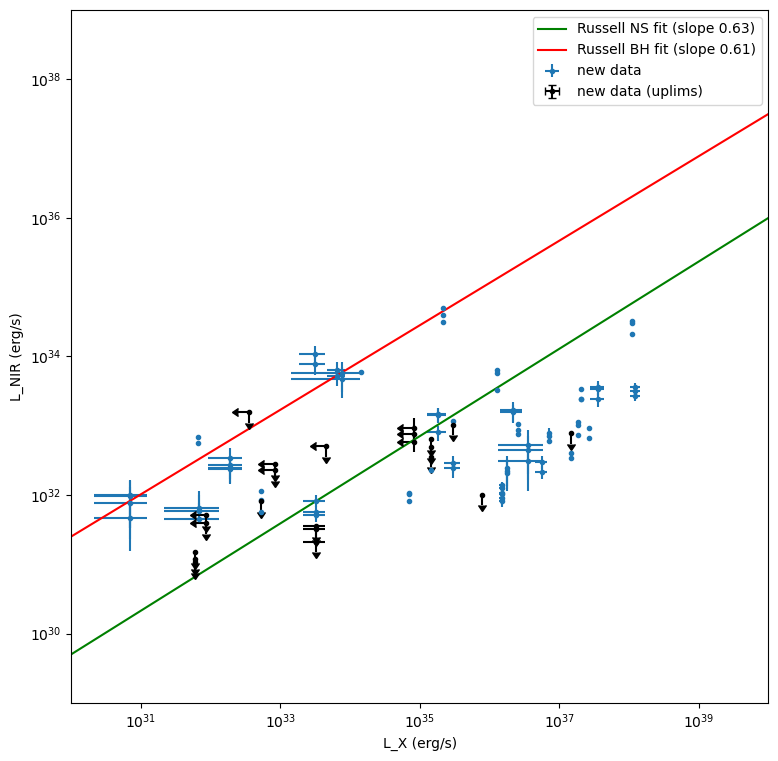

In [4]:
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.3

# Plot regular data points 
ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label='new data', fmt='o', ms=3)

# Plot points with only upplim on NIR luminosity
ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k', label='new data (uplims)')

# Plot points with only upplim on X-ray luminosity
ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k')

# Plot points with upplims on X-ray luminosity and NIR luminosity
ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e29, 10e39)
ax.set_ylim(10e28, 10e38)

# for i, row in tbl.iterrows():
#     ax.annotate(row['Source'], (tbl['L_X'][i], tbl['L_NIR'][i]))

plt.legend()
plt.show()

# TODO Add nice labels for sources

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


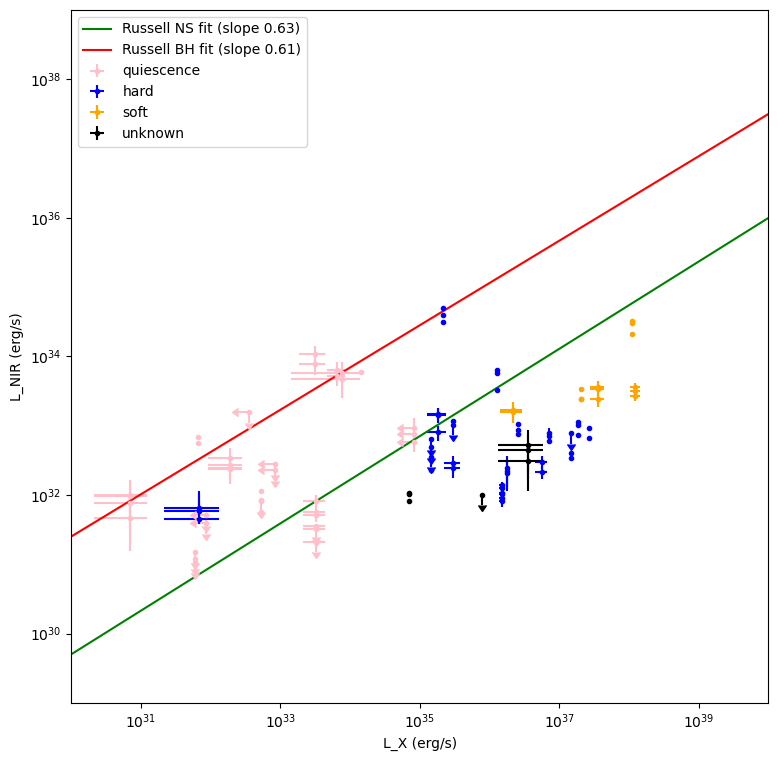

In [5]:
# Separate on state 
states = pd.read_csv('FSRED Mags - total_source_list.csv')
quiescent_sources = states[states['Hard/soft state ']=='quiescence']['Source'].to_list()
quiescent_tbl = tbl[tbl['Source'].isin(quiescent_sources)]
hard_sources = states[states['Hard/soft state ']=='hard']['Source'].to_list()
hard_tbl = tbl[tbl['Source'].isin(hard_sources)]
soft_sources = states[states['Hard/soft state ']=='soft']['Source'].to_list()
soft_tbl = tbl[tbl['Source'].isin(soft_sources)]
unknown_states = states[(states['Hard/soft state ']=='unknown if XRB') | (states['Hard/soft state ']=='unknown')]['Source'].to_list()
unknown_tbl = tbl[tbl['Source'].isin(unknown_states)]

# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.3

def plotfunc(ax, tbl, color, label): 
    # Plot regular data points 
    ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label=label, fmt='o', ms=3, color=color)

    # Plot points with only upplim on NIR luminosity
    ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

# Plot quiescent sources
# plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, quiescent_tbl , color='pink', label='quiescence')
plotfunc(ax, hard_tbl , color='blue', label='hard')
plotfunc(ax, soft_tbl , color='orange', label='soft')
plotfunc(ax, unknown_tbl , color='k', label='unknown')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e29, 10e39)
ax.set_ylim(10e28, 10e38)

plt.legend()
plt.show()


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


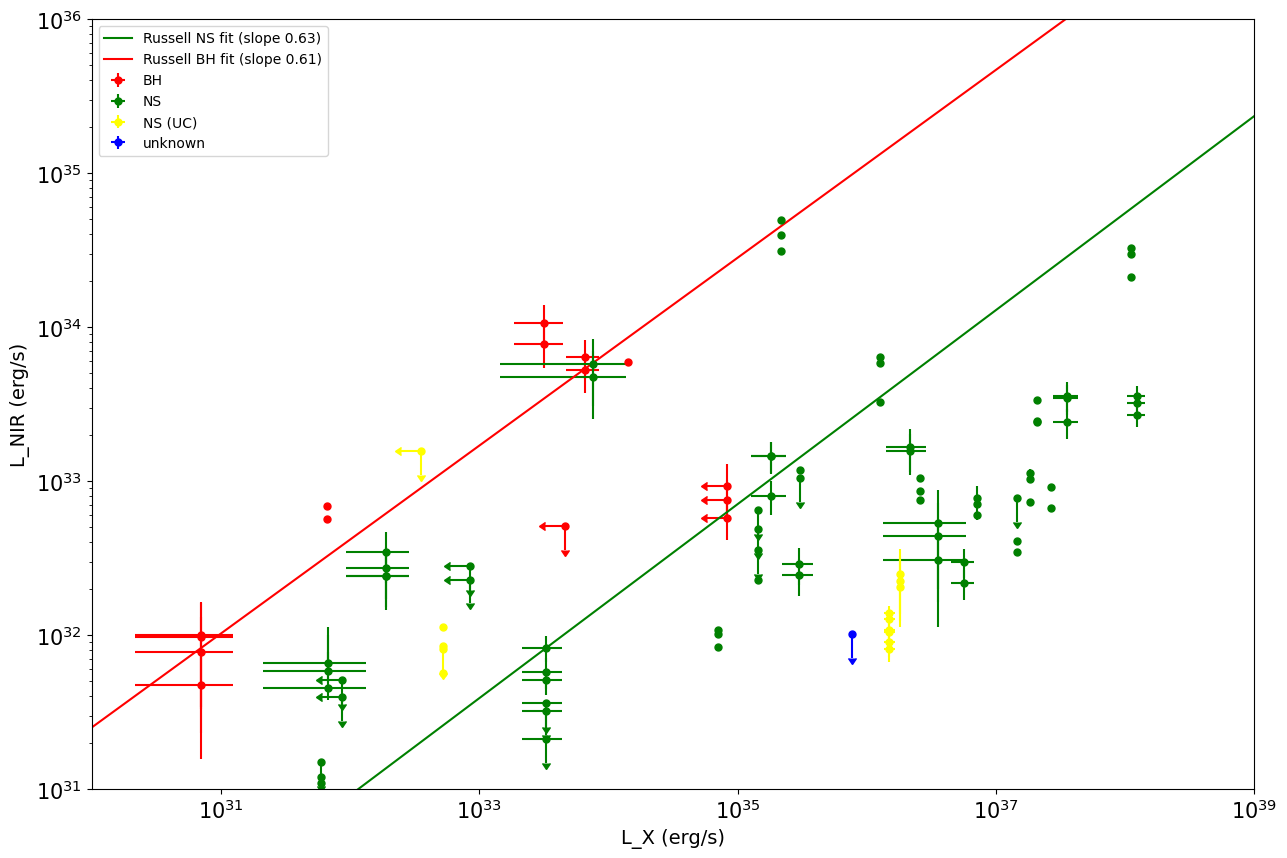

In [6]:
# Separate on compact object
bhs = states[states['NS/BH']=='BH']['Source'].to_list()
BH_tbl = tbl[tbl['Source'].isin(bhs)]
nss = states[(states['NS/BH']=='NS') | (states['NS/BH']=='NS ')]['Source'].to_list()
NS_tbl = tbl[tbl['Source'].isin(nss)]
nss_uc = states[states['NS/BH']=='NS (UC)']['Source'].to_list()
NSUC_tbl = tbl[tbl['Source'].isin(nss_uc)]
unknown_CO = states[states['NS/BH']=='unknown']['Source'].to_list()
unknown_tbl = tbl[tbl['Source'].isin(unknown_CO)]

# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (15,10))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.3

def plotfunc(ax, tbl, color, label): 
    # Plot regular data points 
    ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label=label, fmt='o', ms=5, color=color)

    # Plot points with only upplim on NIR luminosity
    ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

# Plot quiescent sources
# plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, BH_tbl , color='red', label='BH')
plotfunc(ax, NS_tbl , color='green', label='NS')
plotfunc(ax, NSUC_tbl , color='yellow', label='NS (UC)')
plotfunc(ax, unknown_tbl , color='blue', label='unknown')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)', fontsize=14)
ax.set_ylabel('L_NIR (erg/s)', fontsize=14)
ax.set_xlim(10e29, 10e38)
ax.set_ylim(10e30, 10e35)
ax.tick_params(axis='both', labelsize=15)

plt.legend()
plt.show()


In [7]:
from scipy import stats
valid_ns = ~(np.isnan(NS_tbl['L_X']) | np.isnan(NS_tbl['L_NIR']))
valid_bh = ~(np.isnan(BH_tbl['L_X']) | np.isnan(BH_tbl['L_NIR']))

corr_bh = stats.pearsonr(BH_tbl['log_L_X'][valid_bh], BH_tbl['log_L_NIR'][valid_bh])
print('pearson correlation BHs: ', corr_bh)
corr_ns = stats.pearsonr(NS_tbl['log_L_X'][valid_ns], NS_tbl['log_L_NIR'][valid_ns])
print('pearson correlation NSs:', corr_ns)

pearson correlation BHs:  (0.9718599491311892, 5.912694557754723e-07)
pearson correlation NSs: (0.5320312836191967, 1.2153637888680195e-05)


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


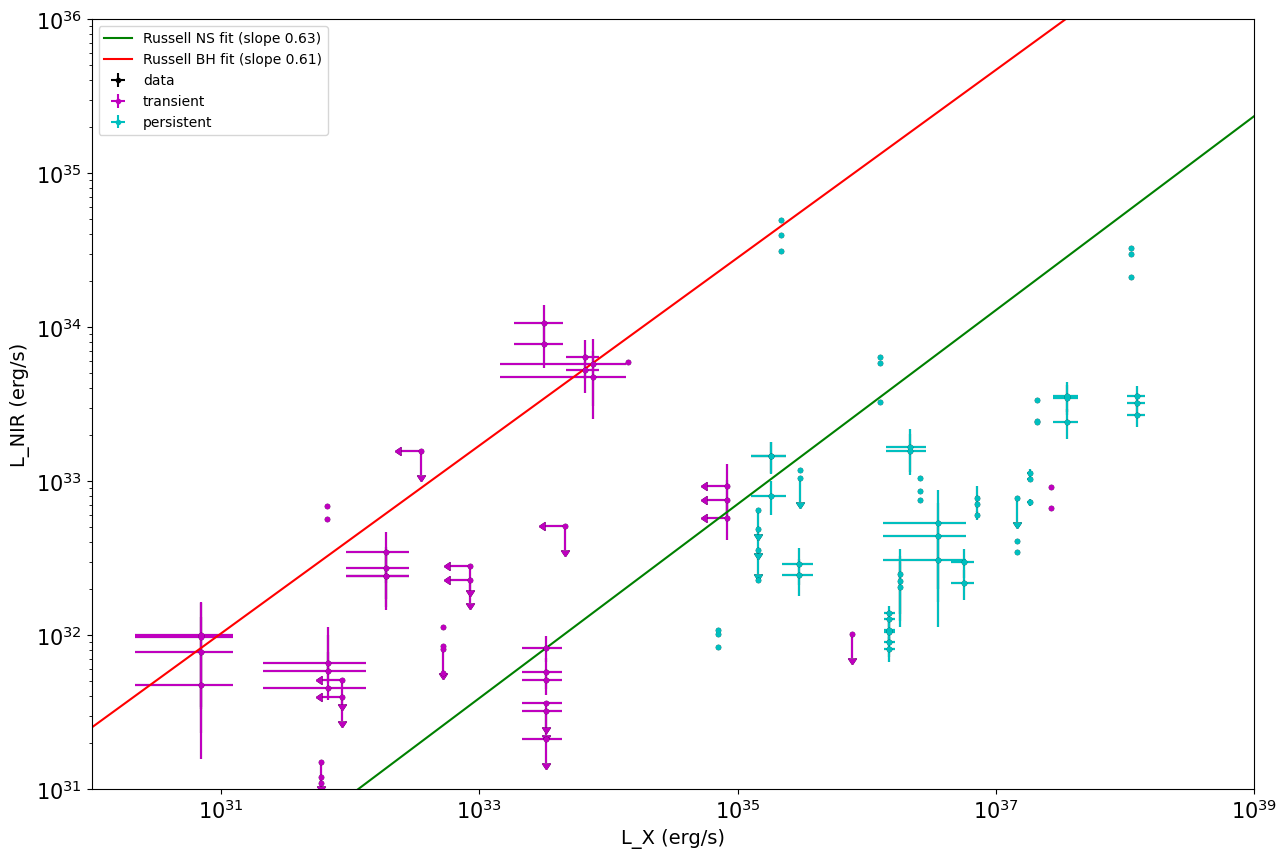

In [8]:
# Separate on transient/persistent
transients = states[states['Transient/persistent']=='transient']['Source'].to_list()
transients_tbl = tbl[tbl['Source'].isin(transients)]
persistents = states[(states['Transient/persistent']=='persistent') | (states['Transient/persistent']=='persistent ')]['Source'].to_list()
persistents_tbl = tbl[tbl['Source'].isin(persistents)]


# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (15, 10))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.3

def plotfunc(ax, tbl, color, label): 
    # Plot regular data points 
    ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label=label, fmt='o', ms=3, color=color)

    # Plot points with only upplim on NIR luminosity
    ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

# Plot quiescent sources
plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, transients_tbl , color='m', label='transient')
plotfunc(ax, persistents_tbl , color='c', label='persistent')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)', fontsize=14)
ax.set_ylabel('L_NIR (erg/s)', fontsize=14)
ax.set_xlim(10e29, 10e38)
ax.set_ylim(10e30, 10e35)
ax.tick_params(axis='both', labelsize=15)

plt.legend()
plt.show()


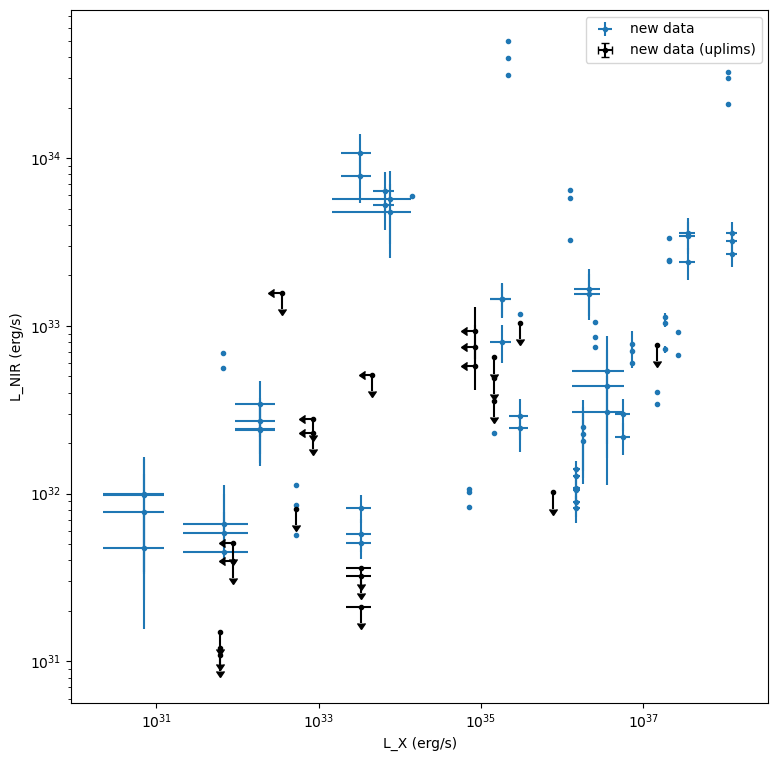

In [9]:


fig, ax = plt.subplots(figsize = (9, 9))
# xrange= np.logspace(29, 41, num=10)
# y = 10**10.8 * xrange**(0.63)
# ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
# y_bh = 10**13.1 * xrange**0.61
# ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.2

# Plot regular data points 
ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label='new data', fmt='o', ms=3)

# Plot points with only upplim on NIR luminosity
ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k', label='new data (uplims)')

# Plot points with only upplim on X-ray luminosity
ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k')

# Plot points with upplims on X-ray luminosity and NIR luminosity
ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
# ax.set_xlim(10e29, 10e39)
# ax.set_ylim(10e28, 10e38)

# for i, row in tbl.iterrows():
#     ax.annotate(row['Source'], (tbl['L_X'][i], tbl['L_NIR'][i]))

plt.legend()
plt.show()

# TODO Add nice labels for sources

In [10]:
NIR_std_up = np.std((np.log10(tbl['L_NIR_errup_noflux'])))
NIR_std_low = np.std((np.log10(tbl['L_NIR_errlow_noflux'])))
X_std_up = np.std((np.log10(tbl['L_X_errup_noflux'])))
X_std_low = np.std((np.log10(tbl['L_X_errlow_noflux'])))

print(NIR_std_up , NIR_std_low,X_std_up, X_std_low )

0.7021140922121089 0.7375074254559985 1.9776224668382336 2.031636052712945


In [11]:
NIR_std_up = np.std((np.log10(tbl[tbl['D_errup'] < 10]['L_NIR_errup_noflux'])))
NIR_std_low = np.std((np.log10(tbl[tbl['D_errup'] < 10]['L_NIR_errlow_noflux'])))
X_std_up = np.std((np.log10(tbl[tbl['D_errup'] < 10]['L_X_errup_noflux'])))
X_std_low = np.std((np.log10(tbl[tbl['D_errup'] < 10]['L_X_errlow_noflux'])))

print(NIR_std_up , NIR_std_low,X_std_up, X_std_low )

0.6661262438328187 0.7016334405448099 2.0109195979845556 2.0666298972056505


In [12]:
NIR_std_up = np.log10(np.std(((tbl[tbl['D_errup'] < 10]['L_NIR_errup_noflux']))))
NIR_std_low = np.std((np.log10(tbl[tbl['D_errup'] < 10]['L_NIR_errlow_noflux'])))
X_std_up = np.std((np.log10(tbl[tbl['D_errup'] < 10]['L_X_errup_noflux'])))
X_std_low = np.std((np.log10(tbl[tbl['D_errup'] < 10]['L_X_errlow_noflux'])))

print(NIR_std_up , NIR_std_low,X_std_up, X_std_low )

32.7771729768205 0.7016334405448099 2.0109195979845556 2.0666298972056505


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


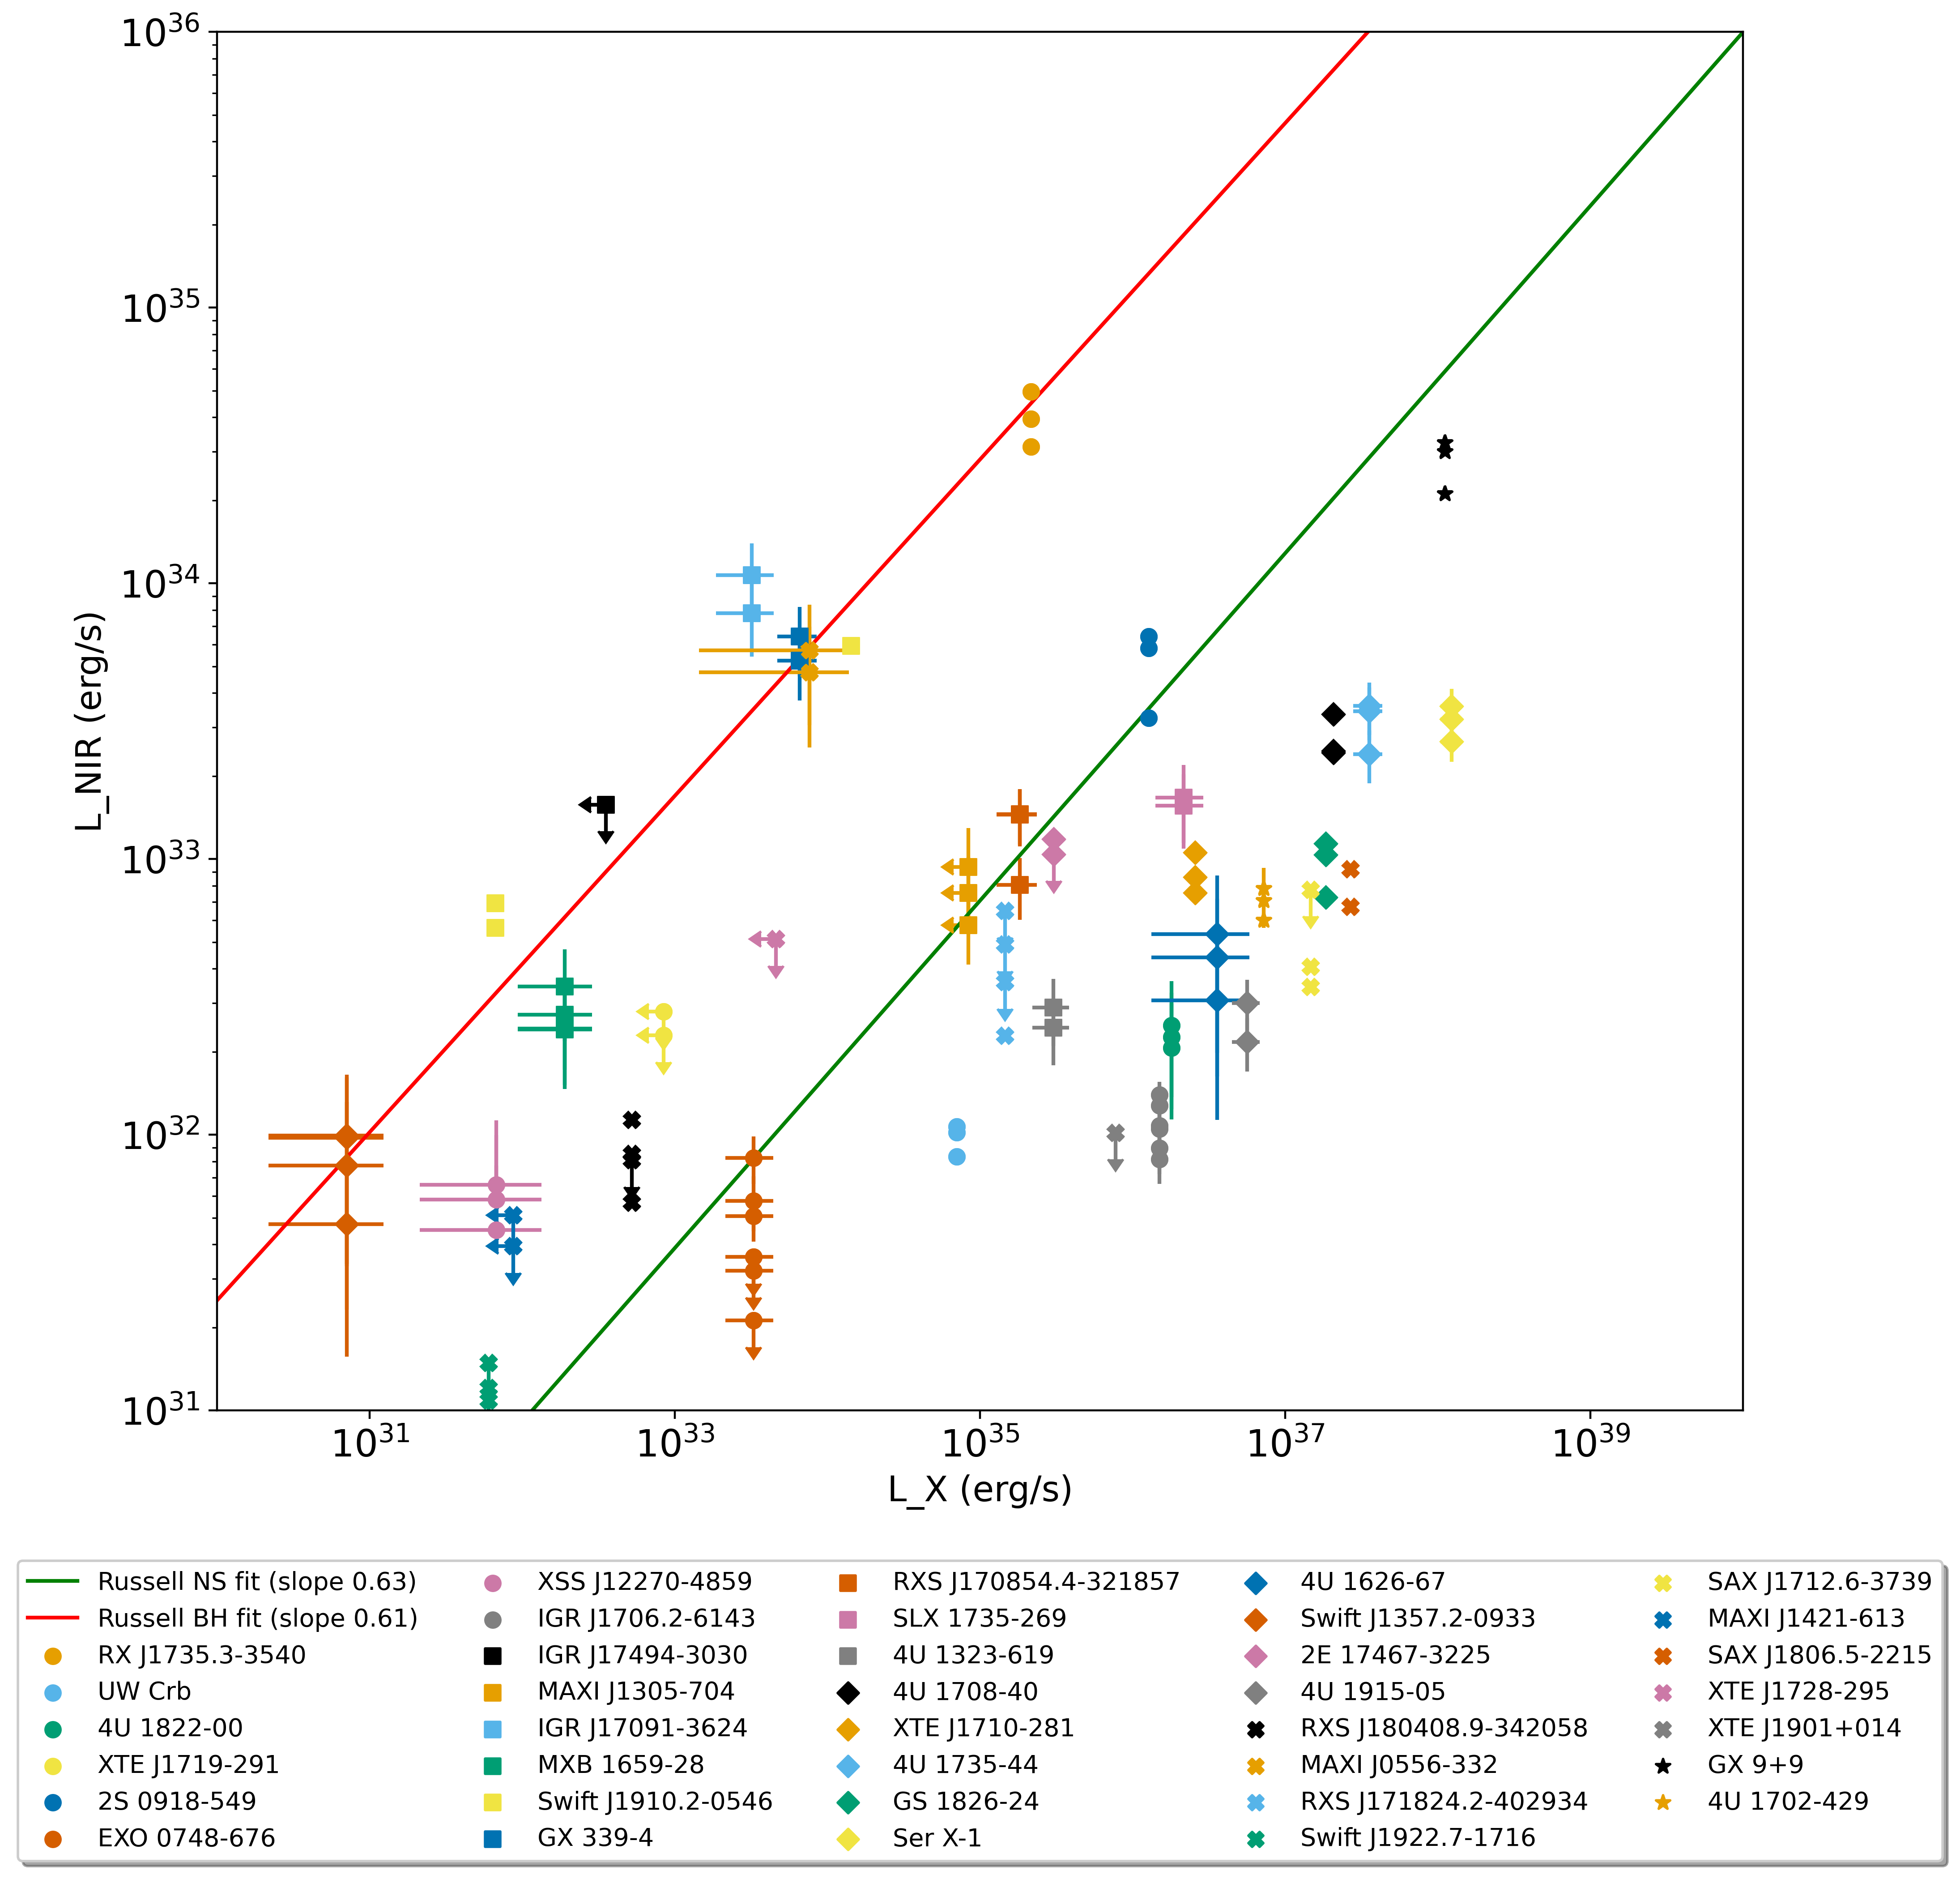

In [13]:
def plotfunc_scatter(ax, tbl, color, shape, label): 
    
    # Remove underscore from labels
    label = label.replace('_', ' ')
    
    # Plot regular data points 
    ax.scatter(tbl['L_X'], tbl['L_NIR'], label=label, c=color, marker=shape, zorder=10) 
    ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[[tbl['L_NIR_errlow']], [tbl['L_NIR_errup']]], xerr=[[tbl['L_X_errlow']], [tbl['L_X_errup']]], marker=shape, fmt='o', color=color)

    # Plot points with only upplim on NIR luminosity
    ax.scatter(tbl['L_X'], tbl['L_NIR_upplim'], label=label, c=color, marker=shape, zorder=10)      
    ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=[tbl['L_NIR_upplim']*arrow_scale], xerr=[[tbl['L_X_errlow']], [tbl['L_X_errup']]], uplims = True, marker=shape, fmt='o', color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.scatter(tbl['L_X_upplim'], tbl['L_NIR'], label=label, c=color, marker=shape, zorder=10)         
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[[tbl['L_NIR_errlow']], tbl[['L_NIR_errup']]], xerr=[tbl['L_X_upplim']*arrow_scale], xuplims = True, marker=shape, fmt='o', color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.scatter(tbl['L_X_upplim'], tbl['L_NIR_upplim'], label=label, c=color, marker=shape, zorder=10)         
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=[tbl['L_NIR_upplim']*arrow_scale], xerr=[tbl['L_X_upplim']*arrow_scale], uplims=True, xuplims=True, marker=shape,fmt='o', color=color)





    
fig, ax = plt.subplots(figsize = (11, 10), dpi=400)
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')
markers = ['o', 's', 'D', 'X', '*']
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey']
options = np.array(np.meshgrid(markers, colors)).T.reshape(-1,2)
# print(options)

arrow_scale = 0.2


i = 0
last_source = 'first'
for n, s in enumerate(tbl['Source']):

    # exclude not plotted sources from legend
    if np.isnan(tbl.iloc[n]['L_NIR']) and np.isnan(tbl.iloc[n]['L_NIR_upplim']) or np.isnan(tbl.iloc[n]['L_X']) and np.isnan(tbl.iloc[n]['L_X_upplim']):
        continue
        
    # every source gets a new shape-color combination
    if s != last_source: 
        i +=1
    shape = options[i][0]
    color = options[i][1]
    last_source = s
    
    # scatter plot the data for which luminosites are available
    try: 
        plotfunc_scatter(ax, tbl.iloc[n], color, shape, s)
    except:
        continue
    
    
# plotfunc(ax, tbl.iloc[0], color='k', label='data')
posx = 1e31
posy = 1e34
# ax.errorbar(posx, posy, yerr=[[errup_nir_frac*posy], [errlow_nir_frac*posy]], xerr=[[errup_nir_frac*posx], [errlow_nir_frac*posx]], marker='.', fmt='o', color='k')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)', fontsize=14)
ax.set_ylabel('L_NIR (erg/s)', fontsize=14)
ax.set_xlim(10e29, 10e39)
ax.set_ylim(10e30, 10e35)
ax.tick_params(axis='both', labelsize=15)

# remove duplicates from legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [14]:
source = 'RXS_J171824.2-402934'
print(tbl[tbl['Source'] == source]['L_NIR'])
print(tbl[tbl['Source'] == source]['nH'])
print(tbl[tbl['Source'] == source]['Distance (kpc)'])

print()
print(tbl[tbl['Source'] == source]['Mag_raw'])
print(tbl[tbl['Source'] == source]['zp_offset'])
print()


print(tbl[tbl['Source'] == source]['Mag_raw'] + tbl[tbl['Source'] == source]['zp_offset'])

85    2.287220e+32
86             NaN
87             NaN
Name: L_NIR, dtype: float64
85    6.680000e+21
86    6.680000e+21
87    6.680000e+21
Name: nH, dtype: float64
85    9.0
86    9.0
87    9.0
Name: Distance (kpc), dtype: float64

85    19.068433
86          NaN
87          NaN
Name: Mag_raw, dtype: float64
85   -0.115202
86   -0.079978
87   -0.068620
Name: zp_offset, dtype: float64

85    18.95323
86         NaN
87         NaN
dtype: float64


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


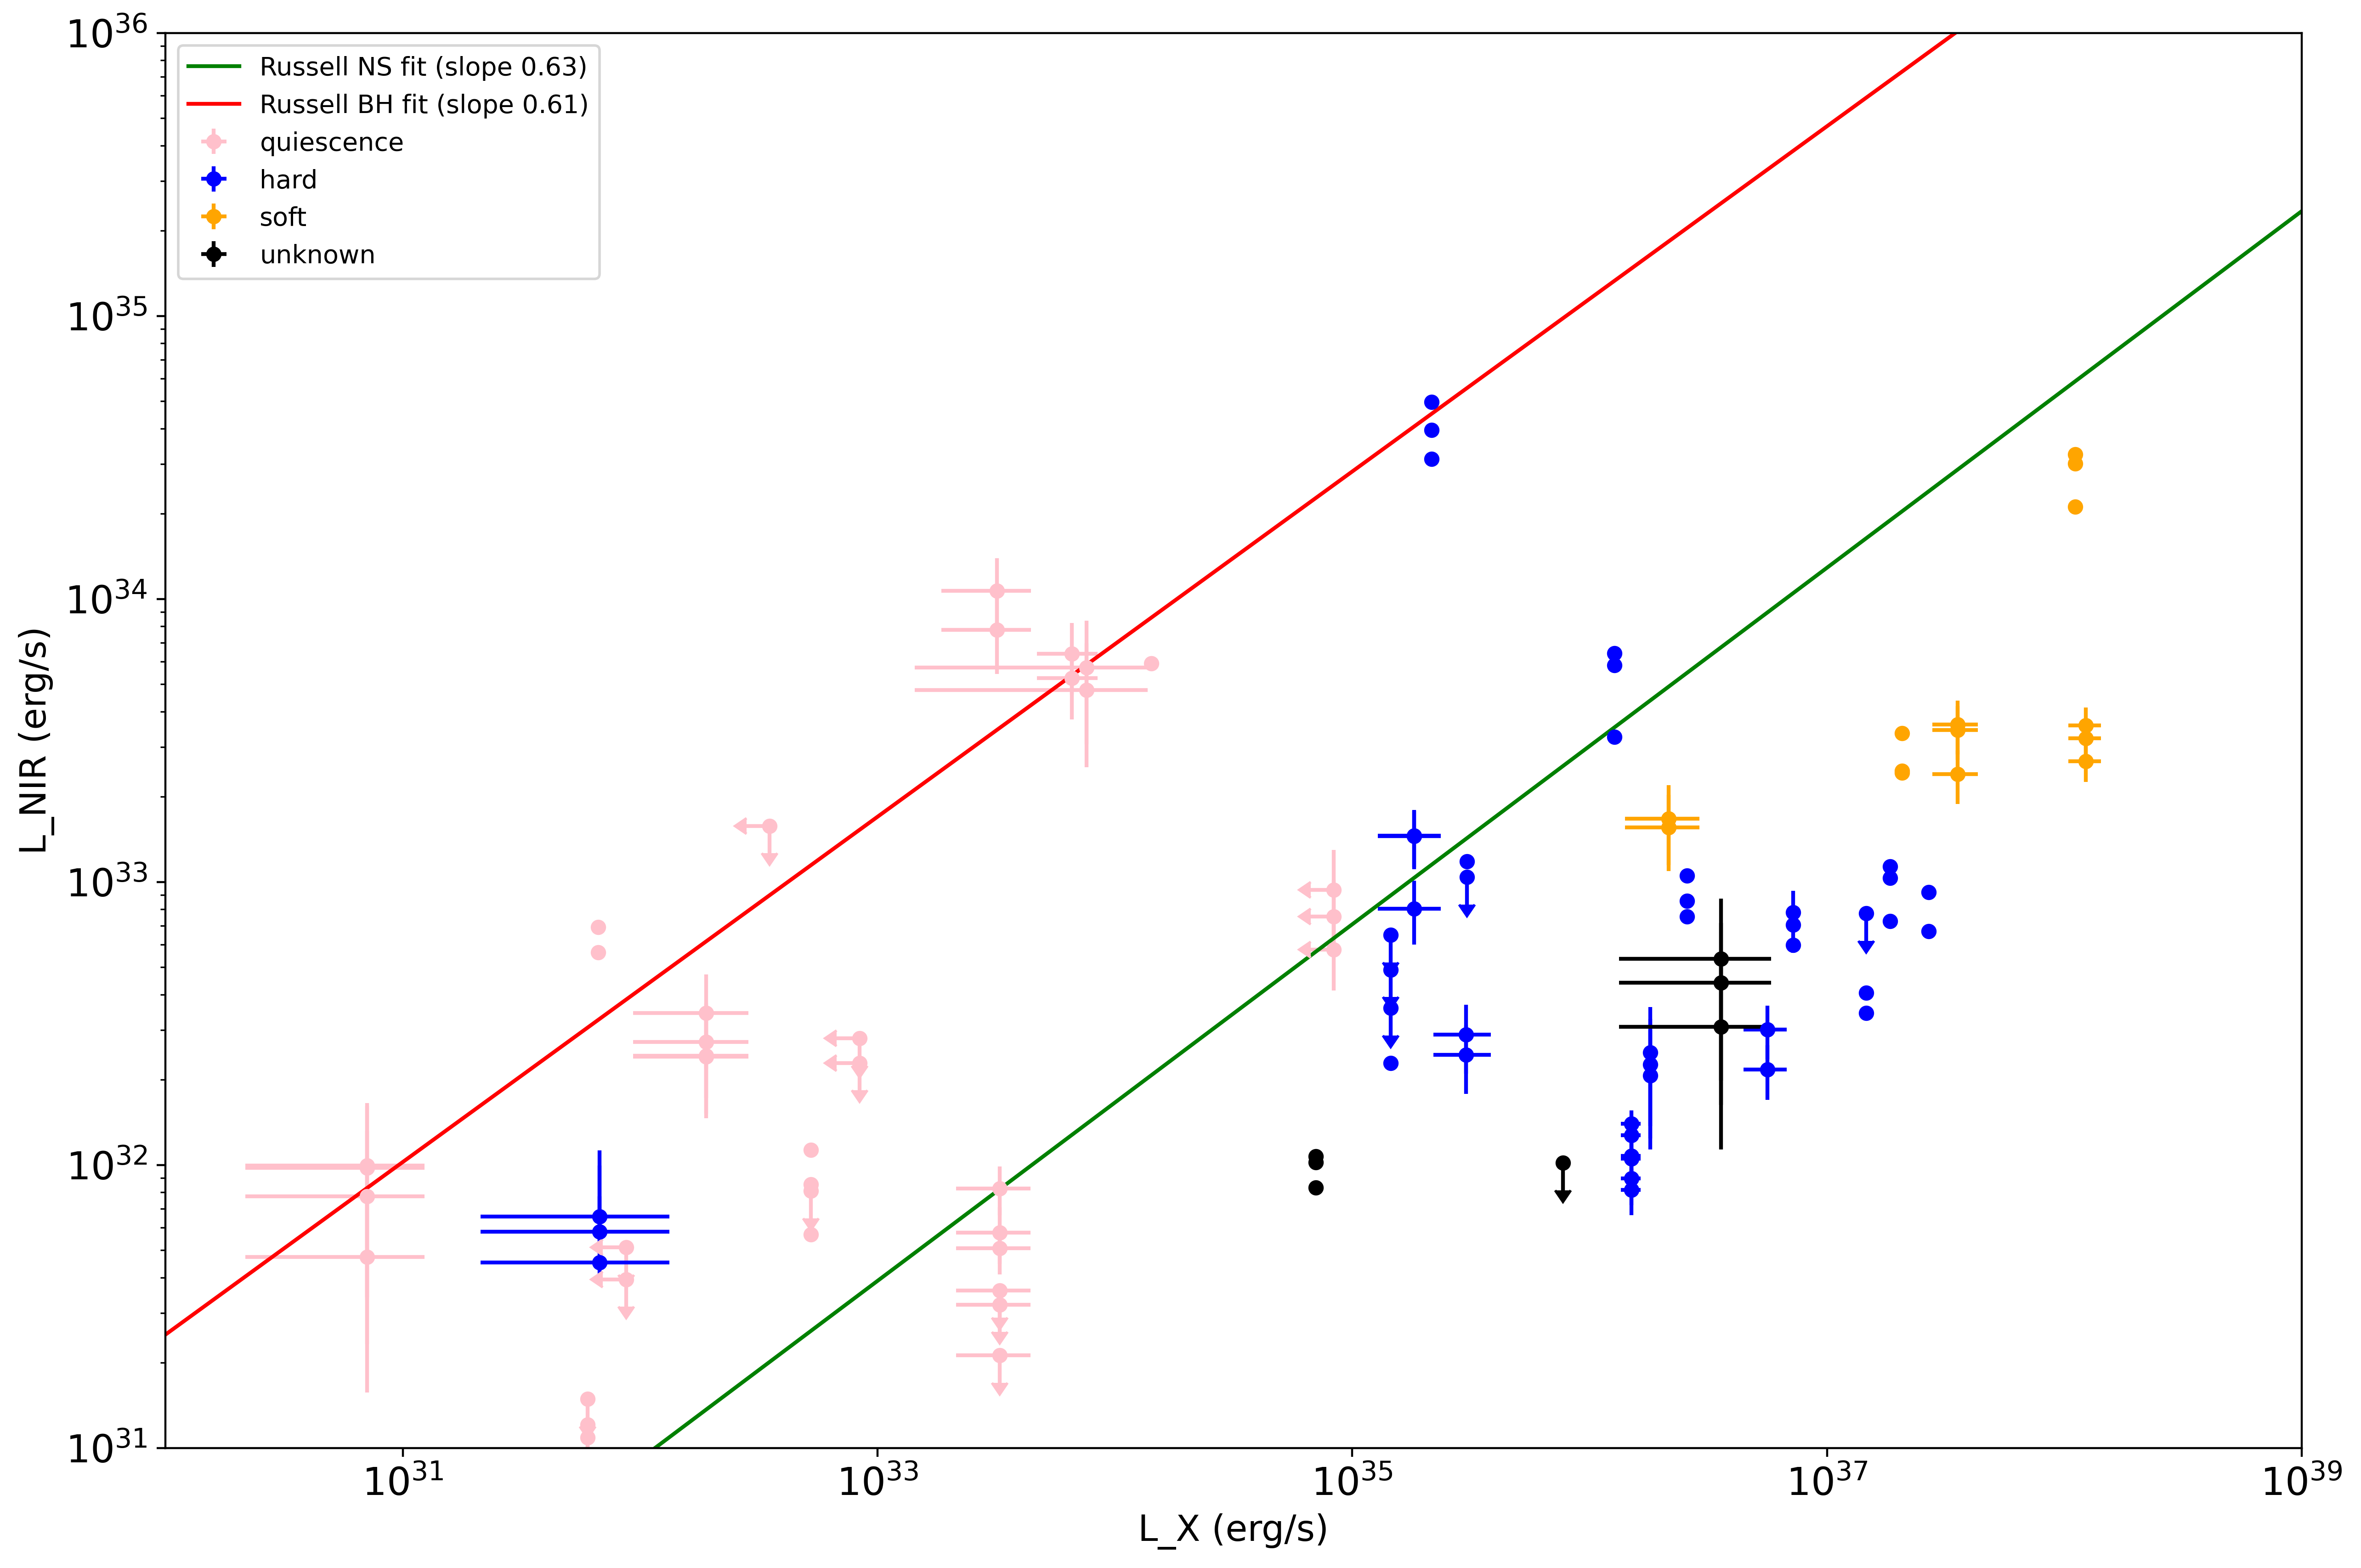

In [15]:
# Separate on state 
states = pd.read_csv('FSRED Mags - total_source_list.csv')
quiescent_sources = states[states['Hard/soft state ']=='quiescence']['Source'].to_list()
quiescent_tbl = tbl[tbl['Source'].isin(quiescent_sources)]
hard_sources = states[states['Hard/soft state ']=='hard']['Source'].to_list()
hard_tbl = tbl[tbl['Source'].isin(hard_sources)]
soft_sources = states[states['Hard/soft state ']=='soft']['Source'].to_list()
soft_tbl = tbl[tbl['Source'].isin(soft_sources)]
unknown_states = states[(states['Hard/soft state ']=='unknown if XRB') | (states['Hard/soft state ']=='unknown')]['Source'].to_list()
unknown_tbl = tbl[tbl['Source'].isin(unknown_states)]

# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (15, 10), dpi=400)
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.2

def plotfunc(ax, tbl, color, label): 
    # Plot regular data points 
    ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label=label, fmt='o', ms=5, color=color)

    # Plot points with only upplim on NIR luminosity
    ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

# Plot quiescent sources
# plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, quiescent_tbl , color='pink', label='quiescence')
plotfunc(ax, hard_tbl , color='blue', label='hard')
plotfunc(ax, soft_tbl , color='orange', label='soft')
plotfunc(ax, unknown_tbl , color='k', label='unknown')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)', fontsize=14)
ax.set_ylabel('L_NIR (erg/s)', fontsize=14)
ax.set_xlim(10e29, 10e38)
ax.set_ylim(10e30, 10e35)
ax.tick_params(axis='both', labelsize=15)

plt.legend()
plt.show()


# Try to fit powerlaw

In [16]:
# TODO fit powerlaw to data?
from scipy.optimize import curve_fit

# objective function
def objective(L_x, a, b):
    return a + L_x * b

def objective_fixed(L_x, a):
    return a + L_x * 0.63

def objective_fixed_repro(L_x, a):
    return a + L_x * 0.5

def objective_fixed_jet(L_x, a):
    return a + L_x * 1.4

def objective_fixed_disc(L_x, a):
    return a + L_x * 0.3

valid = ~(np.isnan(tbl['L_X']) | np.isnan(tbl['L_NIR']))
log_xrange = np.log10(xrange)

popt1, _ = curve_fit(objective, tbl['log_L_X'][valid], tbl['log_L_NIR'][valid])
print(popt1)
y_fit = objective(log_xrange, popt1[0], popt1[1])
                    
popt2, _ = curve_fit(objective_fixed, tbl['log_L_X'][valid], tbl['log_L_NIR'][valid], p0=[10.8])
print(popt2)
y_fit_fixed = objective_fixed(log_xrange, popt2[0])

# Fit reprocessing model
poptrepro, _ = curve_fit(objective_fixed_repro, tbl['log_L_X'][valid], tbl['log_L_NIR'][valid], p0=[20.8])
print(poptrepro)
y_fit_fixed_repro = objective_fixed_repro(log_xrange, poptrepro[0])

# Fit jet model
poptjet, _ = curve_fit(objective_fixed_jet, tbl['log_L_X'][valid], tbl['log_L_NIR'][valid], p0=[-10.8])
print(poptjet)
y_fit_fixed_jet = objective_fixed_jet(log_xrange, poptjet[0])

# Fit disc model
poptdisc, _ = curve_fit(objective_fixed_disc, tbl['log_L_X'][valid], tbl['log_L_NIR'][valid], p0=[20])
print(poptdisc)
y_fit_fixed_disc = objective_fixed_disc(log_xrange, poptdisc[0])

[26.94008199  0.16742964]
[10.61863504]
[15.20558711]
[-16.55023508]
[22.26243651]


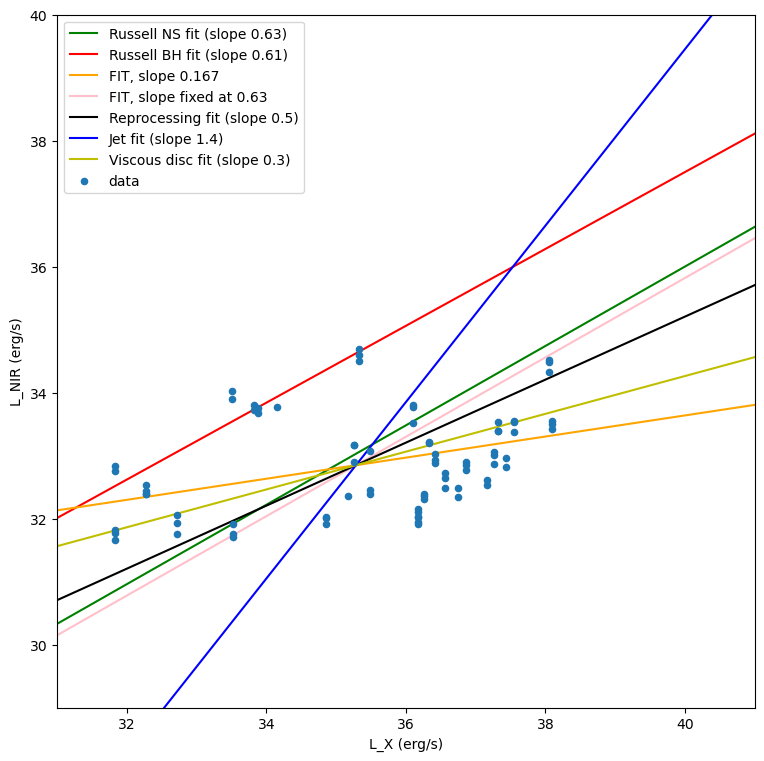

35.11636947033822 32.886512830262


In [17]:
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(np.log10(xrange), np.log10(y), c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
log_xrange = np.log10(xrange)
ax.plot(np.log10(xrange), np.log10(y_bh), c='r', label='Russell BH fit (slope 0.61)')
ax.plot(log_xrange, y_fit, c='orange', label='FIT, slope ' + str(round(popt1[1], 3)))
ax.plot(log_xrange, y_fit_fixed, c='pink', label='FIT, slope fixed at 0.63')
ax.plot(log_xrange, y_fit_fixed_repro, c='k', label='Reprocessing fit (slope 0.5)')
ax.plot(log_xrange, y_fit_fixed_jet, c='b', label='Jet fit (slope 1.4)')
ax.plot(log_xrange, y_fit_fixed_disc, c='y', label='Viscous disc fit (slope 0.3)')

ax.scatter(tbl['log_L_X'], tbl['log_L_NIR'], label='data', s=20, zorder=10)
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e30, 10e40)
ax.set_ylim(10e29, 10e36)
ax.set_xlim(31, 41)
ax.set_ylim(29, 40)
ax.plot(np.mean(tbl['log_L_X']), np.mean(tbl['log_L_NIR']), ms=1, color='r')
plt.legend()
plt.show()

print(np.mean(tbl['log_L_X']), np.mean(tbl['log_L_NIR']))



In [18]:
'determine R^2 values'

objs = [objective, objective_fixed, objective_fixed_repro, objective_fixed_jet, objective_fixed_disc]
fits = [y_fit, y_fit_fixed, y_fit_fixed_repro, y_fit_fixed_jet, y_fit_fixed_disc]
fits_str = ['y_fit', 'y_fit_fixed', 'y_fit_fixed_repro', 'y_fit_fixed_jet', 'y_fit_fixed_disc']
popts = [popt1, popt2, poptrepro, poptjet, poptdisc]
for n, fit in enumerate(fits):
    if n == 0:
        residuals = tbl['log_L_NIR'][valid] - objs[n](tbl['log_L_X'][valid], popts[n][0], popts[n][1]) 
    else: 
        residuals = tbl['log_L_NIR'][valid] - objs[n](tbl['log_L_X'][valid], popts[n])
        
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((tbl['log_L_NIR'][valid]-np.mean(tbl['log_L_NIR'][valid]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    print(fits_str[n], r_squared)



y_fit 0.1903512849308876
y_fit_fixed -1.2625859363262042
y_fit_fixed_repro -0.5606805407700577
y_fit_fixed_jet -10.12572789809358
y_fit_fixed_disc 0.07101178905879635


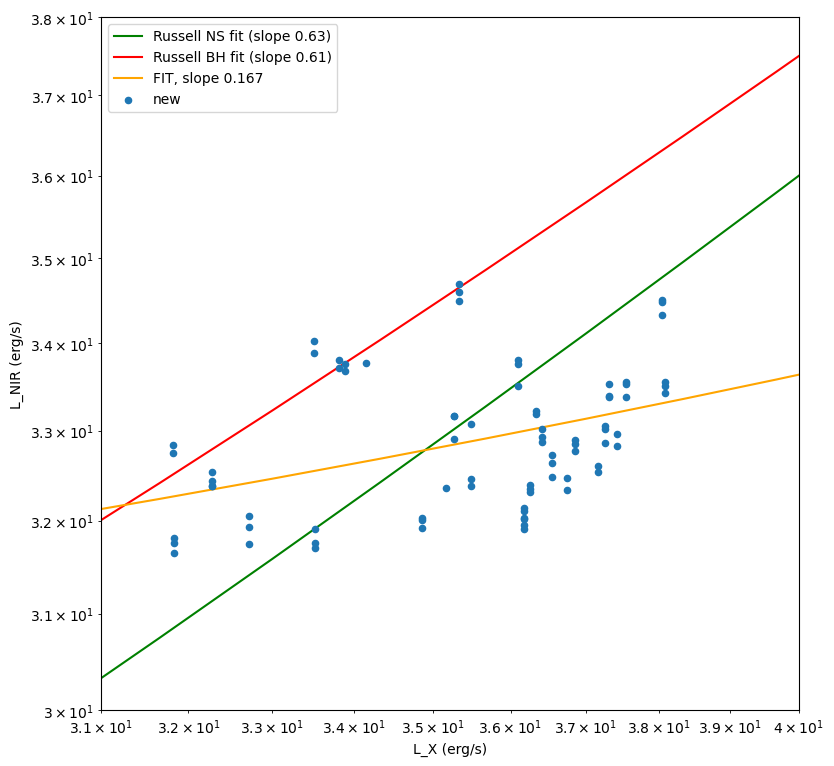

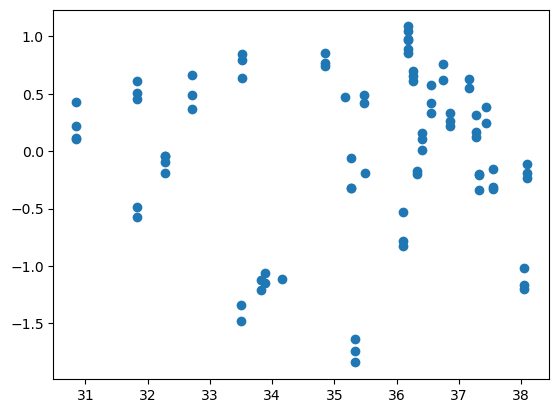

In [19]:
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(log_xrange, np.log10(y), c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(log_xrange, np.log10(y_bh), c='r', label='Russell BH fit (slope 0.61)')
ax.plot(log_xrange, y_fit, c='orange', label='FIT, slope ' + str(round(popt1[1], 3)))
# ax.plot(xrange, y_fit_fixed, c='pink', label='FIT, slope fixed at 0.63')
# ax.plot(xrange, y_fit_fixed_repro, c='k', label='Reprocessing fit (slope 0.5)')
# ax.plot(xrange, y_fit_fixed_jet, c='b', label='Jet fit (slope 1.4)')
# ax.plot(xrange, y_fit_fixed_disc, c='y', label='Viscous disc fit (slope 0.3)')

ax.scatter(tbl['log_L_X'], tbl['log_L_NIR'], label='new', s=20, zorder=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(31, 40)
ax.set_ylim(30, 38)
plt.legend()
plt.show()

LNIR_predict = objective(tbl['log_L_X'], popt1[0], popt1[1])
resid = LNIR_predict - tbl['log_L_NIR']
plt.scatter(tbl['log_L_X'], resid)

6      0.194979
7      0.194979
8      0.194979
14     0.074698
15     0.074698
16     0.074698
17          NaN
18          NaN
19          NaN
20     0.309334
21     0.309334
22     0.309334
23     0.042067
24     0.042067
25     0.042067
26     0.042067
27     0.042067
28     0.042067
30     0.147404
31     0.147404
32     0.147404
33     0.131611
34     0.131611
35     0.153546
36     0.153546
37     0.153546
38     0.153546
42     0.122837
43     0.122837
44     0.094490
45     0.094490
46     0.094490
47     0.122837
48     0.122837
49     0.116988
50     0.116988
57     0.093934
58     0.093934
59     0.093934
60     0.021550
61     0.021550
62     0.021550
63     0.067560
64     0.067560
65     0.067560
68     0.272971
69     0.272971
70     0.272971
71     0.285668
72     0.285668
73     0.285668
74     0.285668
77     0.089712
78     0.089712
103    0.021373
104    0.021373
105    0.021373
Name: log_L_NIR_errup_noflux, dtype: float64
0.08818171554566058 0.07746403770428976 0.0

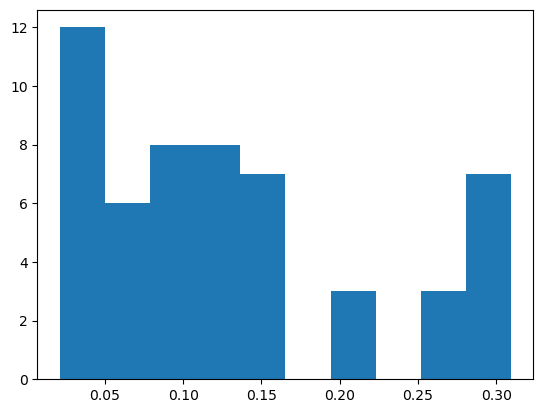

In [20]:
NIR_std_up = np.std(((tbl[tbl['D_errup'] < 10]['log_L_NIR_errup_noflux'])))
NIR_std_low = np.std(((tbl[tbl['D_errup'] < 10]['log_L_NIR_errlow_noflux'])))
X_std_up = np.std(((tbl[tbl['D_errup'] < 10]['log_L_X_errup_noflux'])))
X_std_low = np.std(((tbl[tbl['D_errup'] < 10]['log_L_X_errlow_noflux'])))

print(tbl[tbl['D_errup'] < 10]['log_L_NIR_errup_noflux'])
plt.hist(tbl[tbl['D_errup'] < 10]['log_L_NIR_errup_noflux'])
print(NIR_std_up , NIR_std_low,X_std_up, X_std_low )
print(np.std(np.array([2, 2, 3,  np.nan])))

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


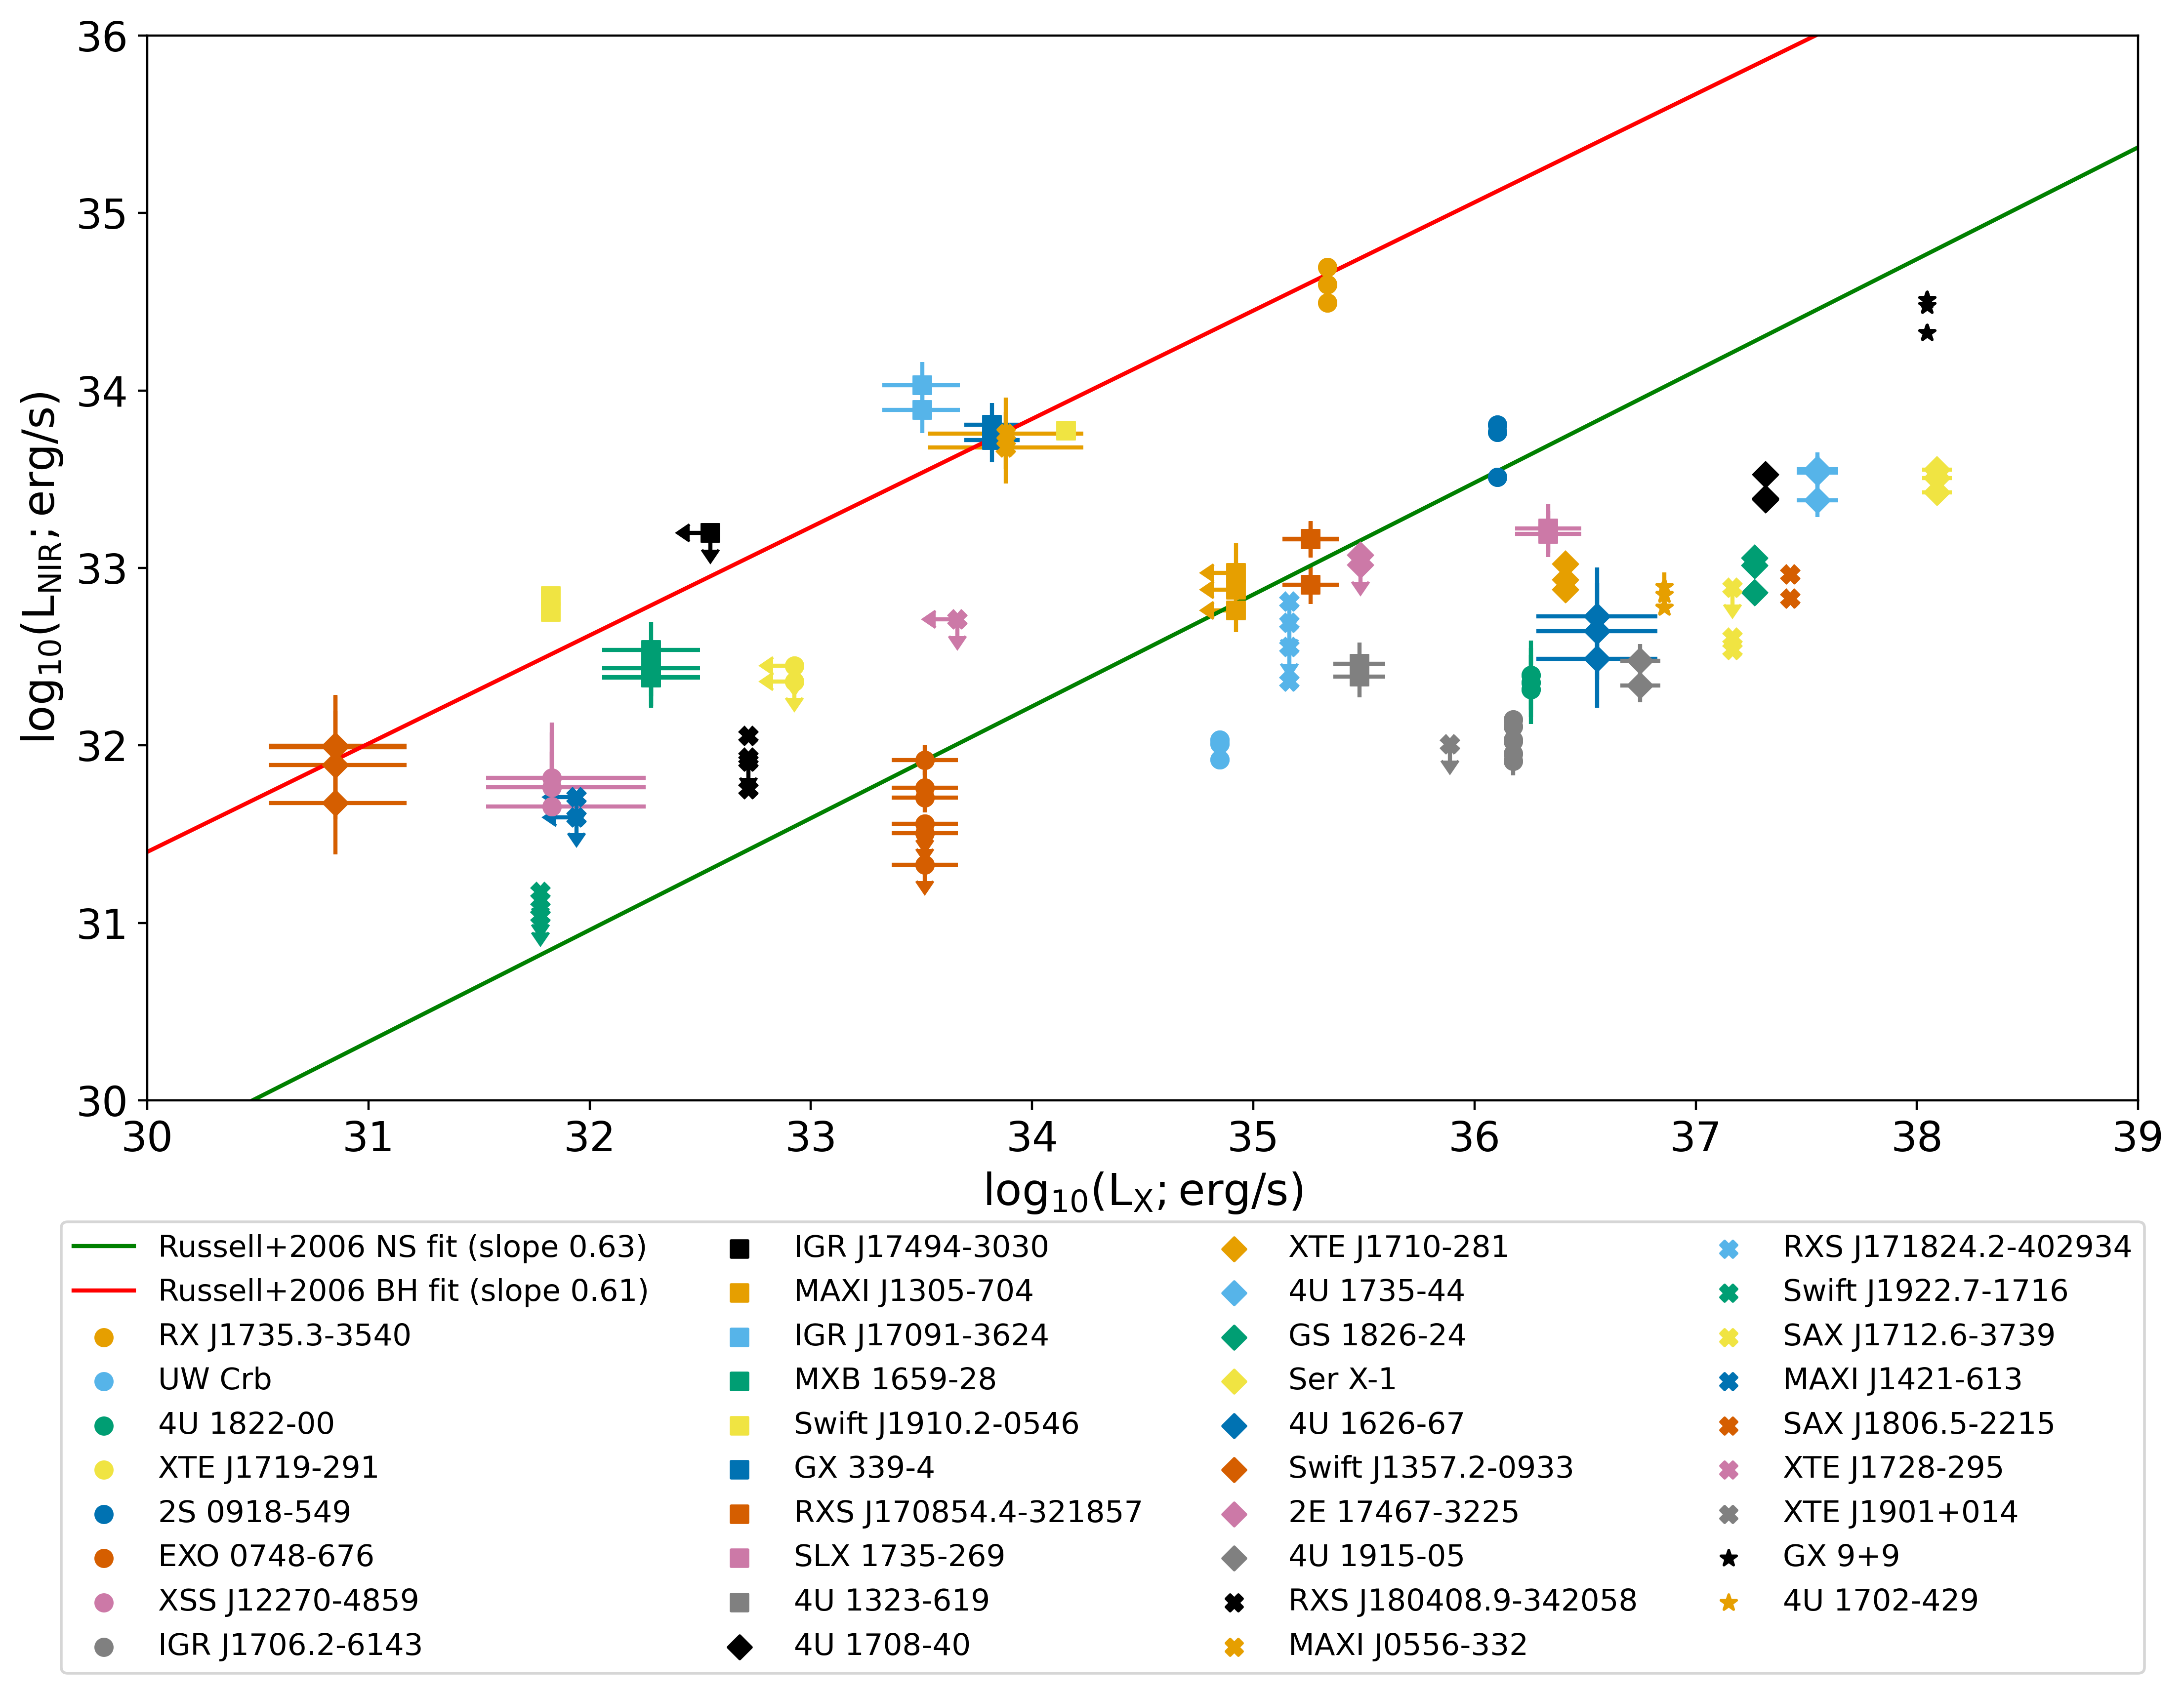

In [35]:
def plotfunc_scatter(ax, tbl, color, shape, label): 
    
    # Remove underscore from labels
    label = label.replace('_', ' ')
    # Plot regular data points 
    ax.scatter(tbl['log_L_X'], tbl['log_L_NIR'], label=label, c=color, marker=shape, zorder=10) 
    ax.errorbar(tbl['log_L_X'], tbl['log_L_NIR'], yerr=[[tbl['log_L_NIR_errlow']], [tbl['log_L_NIR_errup']]], xerr=[[tbl['log_L_X_errlow']], [tbl['log_L_X_errup']]], marker=shape, fmt='o', color=color)

    # Plot points with only upplim on NIR luminosity
    ax.scatter(tbl['log_L_X'], tbl['log_L_NIR_upplim'], label=label, c=color, marker=shape, zorder=10)      
    ax.errorbar(tbl['log_L_X'], tbl['log_L_NIR_upplim'], yerr=[tbl['log_L_NIR_upplim']*arrow_scale], xerr=[[tbl['log_L_X_errlow']], [tbl['log_L_X_errup']]], uplims = True, marker=shape, fmt='o', color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.scatter(tbl['log_L_X_upplim'], tbl['log_L_NIR'], label=label, c=color, marker=shape, zorder=10)         
    ax.errorbar(tbl['log_L_X_upplim'], tbl['log_L_NIR'], yerr=[[tbl['log_L_NIR_errlow']], tbl[['log_L_NIR_errup']]], xerr=[tbl['log_L_X_upplim']*arrow_scale], xuplims = True, marker=shape, fmt='o', color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.scatter(tbl['log_L_X_upplim'], tbl['log_L_NIR_upplim'], label=label, c=color, marker=shape, zorder=10)         
    ax.errorbar(tbl['log_L_X_upplim'], tbl['log_L_NIR_upplim'], yerr=[tbl['log_L_NIR_upplim']*arrow_scale], xerr=[tbl['log_L_X_upplim']*arrow_scale], uplims=True, xuplims=True, marker=shape,fmt='o', color=color)





    
fig, ax = plt.subplots(figsize = (13, 7), dpi=400)
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(np.log10(xrange), np.log10(y), c='g', label='Russell+2006 NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(np.log10(xrange), np.log10(y_bh), c='r', label='Russell+2006 BH fit (slope 0.61)')
markers = ['o', 's', 'D', 'X', '*']
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey']
options = np.array(np.meshgrid(markers, colors)).T.reshape(-1,2)
# print(options)

arrow_scale = 0.2 / np.log(10) / 30

i = 0
last_source = 'first'
for n, s in enumerate(tbl['Source']):

    # exclude not plotted sources from legend
    if np.isnan(tbl.iloc[n]['L_NIR']) and np.isnan(tbl.iloc[n]['L_NIR_upplim']) or np.isnan(tbl.iloc[n]['L_X']) and np.isnan(tbl.iloc[n]['L_X_upplim']):
        continue
        
    # every source gets a new shape-color combination
    if s != last_source: 
        i +=1
    shape = options[i][0]
    color = options[i][1]
    last_source = s
    
    # scatter plot the data for which luminosites are available
    try: 
        plotfunc_scatter(ax, tbl.iloc[n], color, shape, s)
    except:
        continue
    
# plot errorbar
# ax.errorbar(32, 35, yerr=[[NIR_std_low], [NIR_std_up]], xerr=[[X_std_low] , [X_std_up]], fmt='o', ms=5, color='k')

ax.set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=16)
ax.set_ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=16)
ax.set_xlim(30, 39)
ax.set_ylim(30, 36)
# ax.set_xlim(30, 40)
# ax.set_ylim(29, 39)
ax.tick_params(axis='both', labelsize=15)

# remove duplicates from legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.48, -0.1),
          fancybox=True, shadow=False, ncol=4, fontsize=11)
plt.show()

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


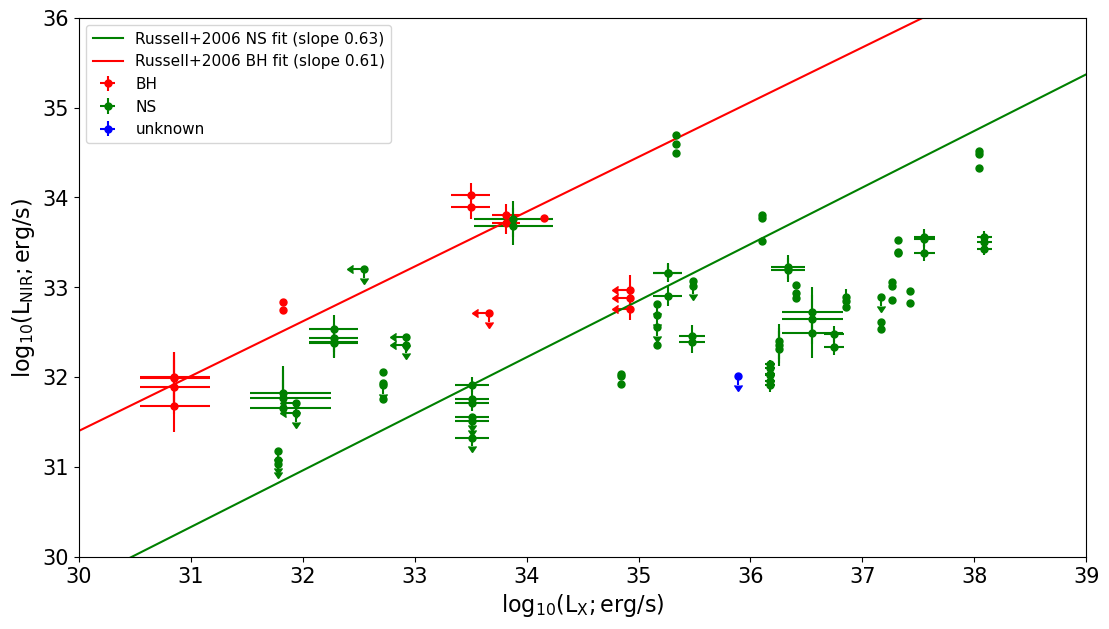

In [46]:
# Separate on compact object
bhs = states[states['NS/BH']=='BH']['Source'].to_list()
BH_tbl = tbl[tbl['Source'].isin(bhs)]
nss = states[(states['NS/BH']=='NS') | (states['NS/BH']=='NS ') | (states['NS/BH']=='NS (UC)')]['Source'].to_list()
NS_tbl = tbl[tbl['Source'].isin(nss)]
# nss_uc = states[states['NS/BH']=='NS (UC)']['Source'].to_list()
# NSUC_tbl = tbl[tbl['Source'].isin(nss_uc)]
unknown_CO = states[states['NS/BH']=='unknown']['Source'].to_list()
unknown_tbl = tbl[tbl['Source'].isin(unknown_CO)]

# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (13,7))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(np.log10(xrange), np.log10(y), c='g', label='Russell+2006 NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(np.log10(xrange), np.log10(y_bh), c='r', label='Russell+2006 BH fit (slope 0.61)')

arrow_scale = 0.2 / np.log(10) / 30

def plotfunc(ax, tbl, color, label): 
    # Plot regular data points 
    ax.errorbar(tbl['log_L_X'], tbl['log_L_NIR'], yerr=[tbl['log_L_NIR_errlow'], tbl['log_L_NIR_errup']], xerr=[tbl['log_L_X_errlow'], tbl['log_L_X_errup']], label=label, fmt='o', ms=5, color=color)

    # Plot points with only upplim on NIR luminosity
    ax.errorbar(tbl['log_L_X'], tbl['log_L_NIR_upplim'], yerr=tbl['log_L_NIR_upplim']*arrow_scale, xerr=[tbl['log_L_X_errlow'], tbl['log_L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.errorbar(tbl['log_L_X_upplim'], tbl['log_L_NIR'], yerr=[tbl['log_L_NIR_errlow'], tbl['log_L_NIR_errup']], xerr=tbl['log_L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.errorbar(tbl['log_L_X_upplim'], tbl['log_L_NIR_upplim'], yerr=tbl['log_L_NIR_upplim']*arrow_scale, xerr=tbl['log_L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=5, color=color)

# Plot quiescent sources
# plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, BH_tbl , color='red', label='BH')
plotfunc(ax, NS_tbl , color='green', label='NS')
# plotfunc(ax, NSUC_tbl , color='yellow', label='NS (UC)')
plotfunc(ax, unknown_tbl , color='blue', label='unknown')

ax.set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=16)
ax.set_ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=16)
ax.set_xlim(30, 39)
ax.set_ylim(30, 36)
ax.tick_params(axis='both', labelsize=15)

plt.legend(fontsize=11)
plt.show()


[26.94008258  0.16742962]
[31.79554151 31.90128653 32.00703155 32.11277657 32.21852159 32.32426662
 32.43001164 32.53575666 32.64150168 32.7472467  32.85299173 32.95873675
 33.06448177 33.17022679 33.27597181 33.38171683 33.48746186 33.59320688
 33.6989519  33.80469692]
0.08818171554566058 0.07746403770428976 0.08998908166657461 0.07767571372027542


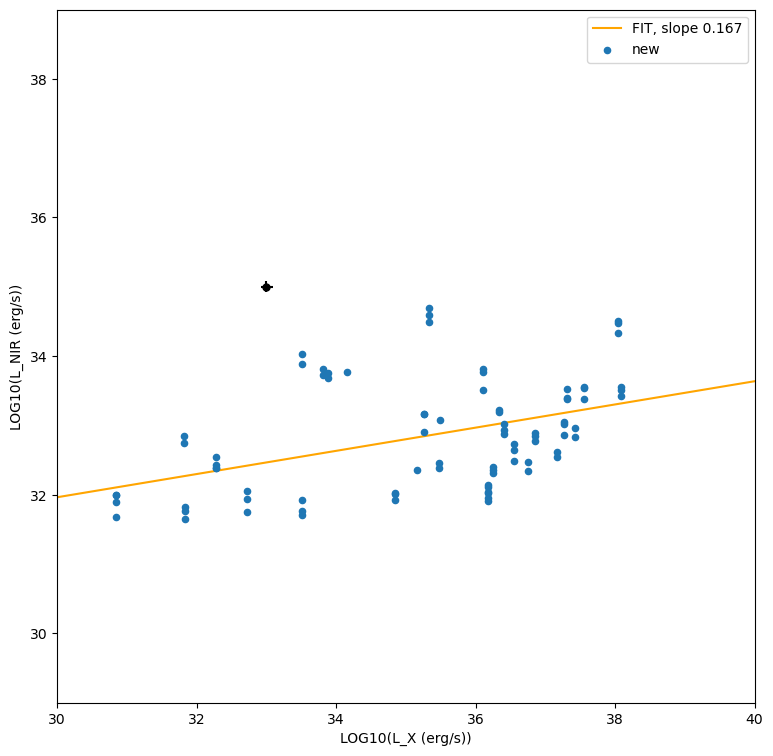

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


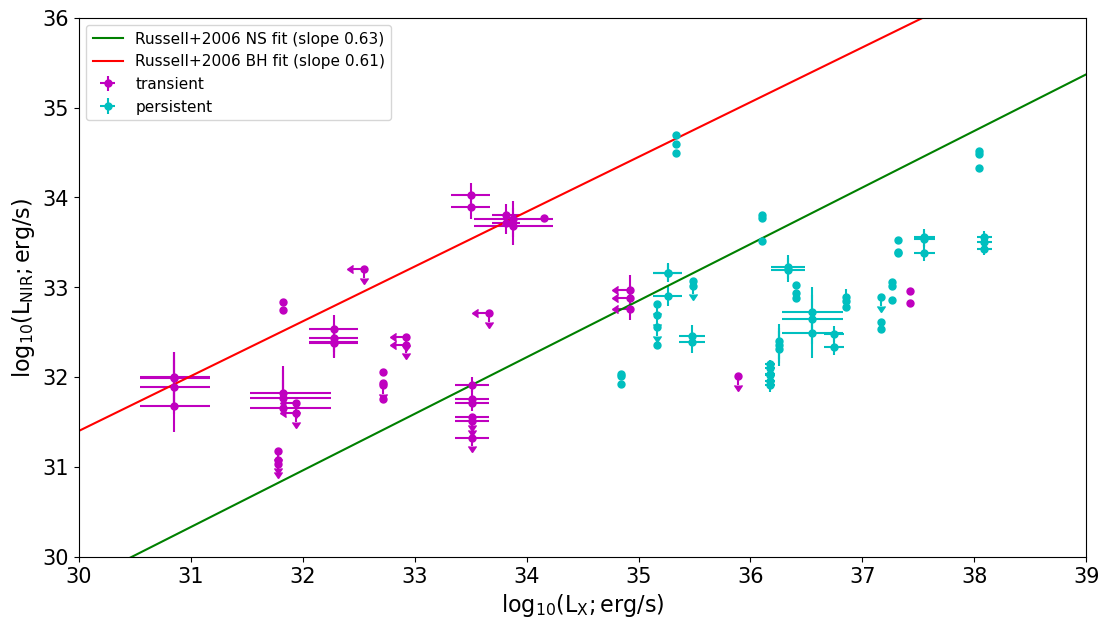

In [44]:
# Separate on transient/persistent
transients = states[states['Transient/persistent']=='transient']['Source'].to_list()
transients_tbl = tbl[tbl['Source'].isin(transients)]
persistents = states[(states['Transient/persistent']=='persistent') | (states['Transient/persistent']=='persistent ')]['Source'].to_list()
persistents_tbl = tbl[tbl['Source'].isin(persistents)]


# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (13,7))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(np.log10(xrange), np.log10(y), c='g', label='Russell+2006 NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(np.log10(xrange), np.log10(y_bh), c='r', label='Russell+2006 BH fit (slope 0.61)')
# Plot quiescent sources
# plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, transients_tbl , color='m', label='transient')
plotfunc(ax, persistents_tbl , color='c', label='persistent')


ax.set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=16)
ax.set_ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=16)
ax.set_xlim(30, 39)
ax.set_ylim(30, 36)
ax.tick_params(axis='both', labelsize=15)

plt.legend(fontsize=11)
plt.show()


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


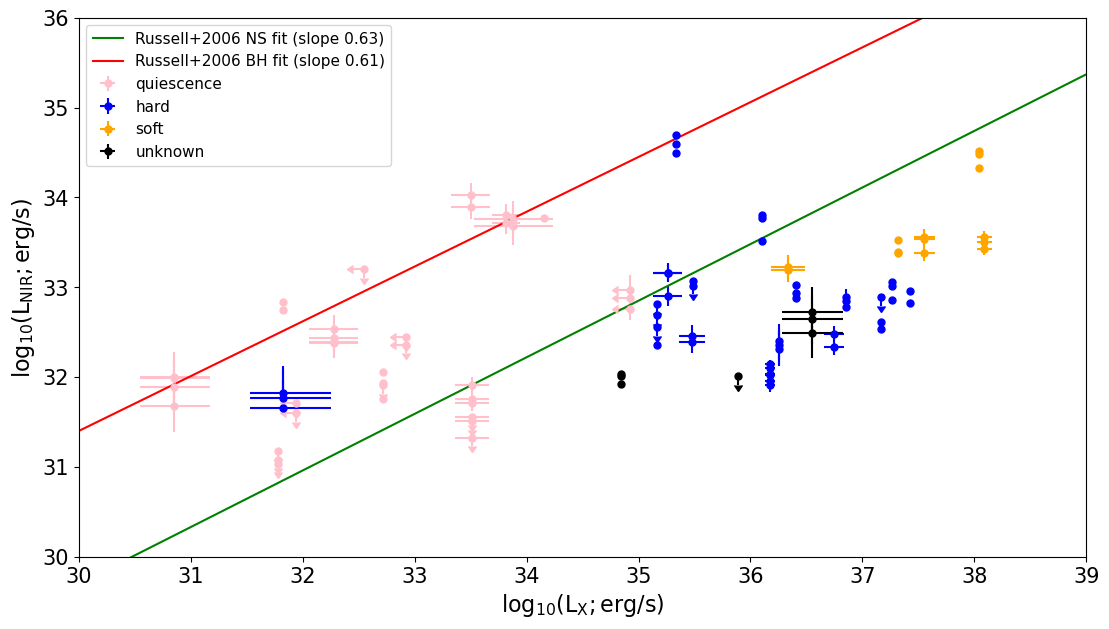

In [47]:
# Separate on state 
states = pd.read_csv('FSRED Mags - total_source_list.csv')
quiescent_sources = states[states['Hard/soft state ']=='quiescence']['Source'].to_list()
quiescent_tbl = tbl[tbl['Source'].isin(quiescent_sources)]
hard_sources = states[states['Hard/soft state ']=='hard']['Source'].to_list()
hard_tbl = tbl[tbl['Source'].isin(hard_sources)]
soft_sources = states[states['Hard/soft state ']=='soft']['Source'].to_list()
soft_tbl = tbl[tbl['Source'].isin(soft_sources)]
unknown_states = states[(states['Hard/soft state ']=='unknown if XRB') | (states['Hard/soft state ']=='unknown')]['Source'].to_list()
unknown_tbl = tbl[tbl['Source'].isin(unknown_states)]

# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (13,7))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(np.log10(xrange), np.log10(y), c='g', label='Russell+2006 NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(np.log10(xrange), np.log10(y_bh), c='r', label='Russell+2006 BH fit (slope 0.61)')



# Plot quiescent sources
# plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, quiescent_tbl , color='pink', label='quiescence')
plotfunc(ax, hard_tbl , color='blue', label='hard')
plotfunc(ax, soft_tbl , color='orange', label='soft')
plotfunc(ax, unknown_tbl , color='k', label='unknown')

ax.set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=16)
ax.set_ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=16)
ax.set_xlim(30, 39)
ax.set_ylim(30, 36)
ax.tick_params(axis='both', labelsize=15)

plt.legend(fontsize=11)
plt.show()


In [ ]:

def objective(L_x, a, b):
    return a + b * L_x 


popt1, _ = curve_fit(objective, np.log10(tbl['L_X'][valid]), np.log10(tbl['L_NIR'][valid]))
print(popt1)
xrange= np.linspace(29, 41, 20)
y_fit = objective(xrange, popt1[0], popt1[1])
print(y_fit)
fig, ax = plt.subplots(figsize = (9, 9))
ax.plot(xrange, y_fit, c='orange', label='FIT, slope ' + str(round(popt1[1], 3)))

# Plot standard error
print(NIR_std_up , NIR_std_low,X_std_up, X_std_low )
ax.errorbar(33, 35, yerr=[[NIR_std_low], [NIR_std_up]], xerr=[[X_std_low] , [X_std_up]], fmt='o', ms=5, color='k')

ax.scatter(np.log10(tbl['L_X']), np.log10(tbl['L_NIR']), label='new', s=20, zorder=10)
ax.set_xlabel('LOG10(L_X (erg/s))')
ax.set_ylabel('LOG10(L_NIR (erg/s))')
ax.set_xlim(30, 40)
ax.set_ylim(29, 39)
plt.legend()
plt.show()